## 0. 타입을 확인하는 함수 

### 타입확인 메서드 사용  

In [2]:
:dep typename = "0.1.2"

In [3]:
use typename::TypeName;

### 타입 확인 함수 사용 

In [4]:
use std::any::type_name;

fn type_of<T>(_: T) -> &'static str {
    type_name::<T>()
}

## 배열의 포인터와 슬라이스의 포인터 비교하기

### 배열의 포인터:

- 배열의 포인터는 일반적으로 로우 포인터(raw pointer)나 일반 참조로 취급되며,
- 배열의 크기가 컴파일 타임에 고정되어 있기 때문에 싱글 포인터(single pointer)로 작동합니다.
- 배열은 크기가 고정되어 있으므로, 배열에 대한 참조나 포인터는 크기 정보를 포함하지 않습니다.
- 이는 정적 타입을 가지는 포인터로, 컴파일 시 배열의 크기가 이미 결정됩니다.

### 슬라이스의 포인터:
- 슬라이스(slice)는 배열과 달리 크기가 런타임에 결정될 수 있으며, 이는 팻 포인터(fat pointer)를 통해 표현됩니다.
- 팻 포인터는 두 가지 정보를 포함하는데, 데이터에 대한 포인터와 슬라이스의 길이입니다.
- 예를 들어, &[T] 슬라이스 참조는 실제 배열 데이터와 그 크기를 포함하는 포인터로, 데이터의 시작 주소와 길이를 함께 저장하는 2개의 필드로 구성됩니다.

### 차이점:
- 배열 포인터: 싱글 포인터로, 배열의 첫 번째 요소의 주소만 가리킵니다.
- 슬라이스 포인터: 팻 포인터로, 데이터와 크기 정보를 함께 포함합니다.

## 1. 슬라이스

- 슬라이스는 항상 참조로 처리한다.
- 기존 내용을 참조하는 레퍼런스로 만들어진다.

- 슬라이스는 마지막을 포함하지 않는다.
- 포함되려면 숫자는 = 다음에 표시


### 슬라이스의 팻포인터 

- Fat pointer는 메모리 영역에 대한 포인터와 크기 정보를 모두 가지고 있습니다. 
- 이러한 fat pointer는 Slice 타입에서 사용되며, Slice 타입에 대한 포인터인 &str과 &mut [T]는 fat pointer의 형태를 가지고 있습니다.

- 따라서, Rust에서 Slice를 사용할 때는 포인터의 개념과 함께 fat pointer를 사용하게 됩니다. fat pointer는 C++에서의 포인터와 유사한 개념으로, 해당 메모리 공간의 시작 주소와 길이를 가지고 있는 포인터입니다. 
- 이러한 포인터를 사용하면 Slice 타입의 데이터를 보다 안전하게 다룰 수 있습니다.

# String에 대한 슬라이스 팻포인터 이미지

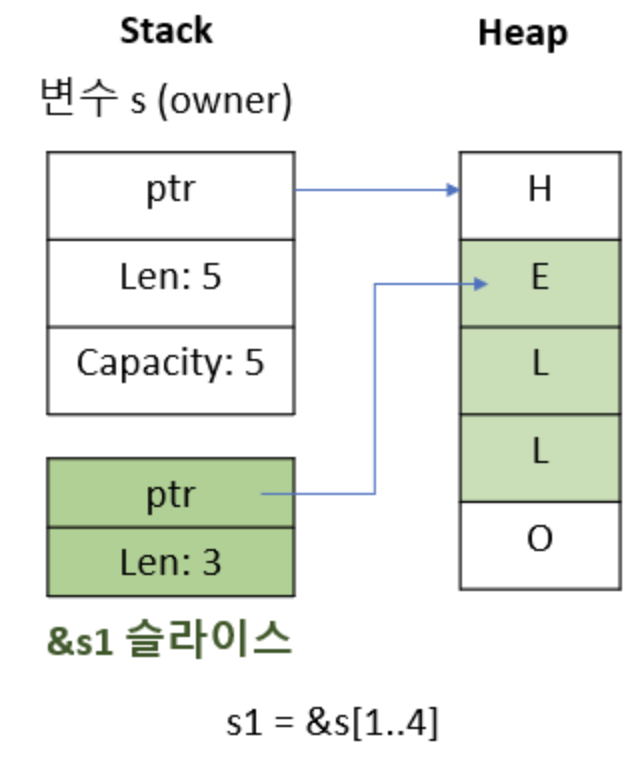

## 1-1 슬라이스 타입 표기 


### 슬라이스는 불변이다. 그래서 &참조를 꼭 앞에 붙인다 
- 슬라이스 타입 지정하기 => &[T]:  공유된 슬라이스 , 대여만 가능
- 배열 타입 지정하기 => [T; N ] => 타입과 길이를 꼭 지정해야 함 

In [9]:
{ 
    let a: [i32; 6] = [10, 20, 30, 40, 50, 60];  // 배열정의 

    let s: &[i32] = &a[2..=4];     // 위의 배열에 대한 슬라이스 정의  
                                   // 슬라이스는 특정 범위를 가짐 
}


()

### 배열을 정의하고 슬라이스를 받음  : 함수를 정의한 것을 사용해서 타입처리 

####  배열을 정의와 슬라이스 정의 확인

- 배열은 동일한 자료형과 길이를 대괄호에 표시
- 슬라이스는 대괄호에 자료형을 표시하고 대괄호 앞에 참조를 표시

In [6]:
fn main() {
    let a: [i32; 6] = [10, 20, 30, 40, 50, 60];                // 배열 정의 
    println!("배열의 타입 : {a:?} {} ",a.type_name_of());

    let s: &[i32] = &a[2..=4];                                 // 배열의 특정 인텍스를 처리 
    println!("슬라이스 타입: {s:?}, {}", type_of(s));             // 슬라이스에서 메서드 구현되지 있지않음 
    
}

main();

배열의 타입 : [10, 20, 30, 40, 50, 60] [i32; 6] 
슬라이스 타입: [30, 40, 50], &[i32]


### 배열을 정의하고 슬라이스를 받음  : 함수를 정의한 것을 사용해서 타입처리 

- 범위 지정할 때는 앞 인덱스는 포함이고 뒤 인덱스는 불포함 [1..4]
- 뒤 인덱스를 포함시키려면 [1..=4] 로 표시해야함 

In [10]:
fn main() {
    let a: [i32; 6] = [10, 20, 30, 40, 50, 60];        // 배열 정의 
    println!("배열의 타입 : {a:?} 그리고 타입은  {} ",a.type_name_of());

    let s: &[i32] = &a[2..4];                          // 배열의 특정 인텍스를 처리 
    println!("슬라이스 타입: {s:?}, 그리고 타입은 {}",type_of(s));      // 슬라이스 사용할 때 처리 
    
}

main();

배열의 타입 : [10, 20, 30, 40, 50, 60] 그리고 타입은  [i32; 6] 
슬라이스 타입: [30, 40], 그리고 타입은 &[i32]


### 1-2  가변 슬라이스
- &mut [T]: 갱신 가능한 슬라이스 , 상호배타적으로 갱신만 가능 
- 상호배타적이라 현재 갱신 참조를 사용할 때 다른 참조가 발생하면 안된다는 뜻이다.


In [13]:
fn main() {
    let mut a: [i32; 6] = [10, 20, 30, 40, 50, 60];      // 배열 정의 
    println!("배열의 타입 : {a:?} {} ",type_of(&a));
    
    {

        let mut s: &mut [i32] = &mut a[2..4];                    // 배열의 특정 인텍스를 처리 
        println!("변경전 슬라이스 s =  {s:?}, {}",type_of(&s));
    
        s[0] = 300; 
        println!("변경 후의 s = {:?}",s);
    }
    
    println!("최종 배열의 상태는 a = {:?}",a);
}

main();

배열의 타입 : [10, 20, 30, 40, 50, 60] &[i32; 6] 
변경전 슬라이스 s =  [30, 40], &&mut [i32]
변경 후의 s = [300, 40]
최종 배열의 상태는 a = [10, 20, 300, 40, 50, 60]


### 힙 메모리에 배열과 슬라이스 처리 방법 알아보기 
- 스마트 포인터인 Box<[T;N]> 배열을 만들고
- 그 Box<&[T]> 인 슬라이스를 지정할 수 있다.
- 기본 Box는 소유권 이동이므로 힙에 만들어진다. 

In [8]:
fn main() {
    let a: Box<[i32; 6]> = Box::new([10, 20, 30, 40, 50, 60]);      // 배열 정의 
    println!("배열의 타입 : {a:?} {} ",type_of(&a));
    
    let a1 = [102,30,30,40,50];
    let s: Box<&[i32]> = Box::new(&a1[2..4]);                       // 슬라이스 정의 
    
    println!("배열의 타입 :{s:?} {} ",type_of(&s));
    
    
}

main();

배열의 타입 : [10, 20, 30, 40, 50, 60] &alloc::boxed::Box<[i32; 6]> 
배열의 타입 :[30, 40] &alloc::boxed::Box<&[i32]> 


## 1-3 슬라이스 내의 범위 지정 하기 

- 슬라이스는 참조이므로 &[참조되는 범위]
- 러스트 범위연산은 (시작점)..(종료점+ 1)
- 범위연산에서 종료점을 포함하려면  (시작점)..=(종료점+ 1)

### 범위를 표시

In [9]:
let range_a = 1..10;

type_of(range_a)

"core::ops::range::Range<i32>"

### 문자열리터럴을 원소를 가지는 배열을 슬라이스 처리하기 

In [10]:
fn main() {
    let seasons = ["봄", "여름", "가을", "겨울"]; // 배열 정의 
    println!("{:?}", seasons);                // 배열 출력 
    
    println!("{:? } ", &seasons[0..2]);       // 슬라이스를 참조할 때는 레퍼런스로 처리해야 함
    
    let ss = &seasons[0..=2];                 // 슬라이스 값을 변수에 정의    
    println!("{:?}", ss);
} 

main();

["봄", "여름", "가을", "겨울"]
["봄", "여름"] 
["봄", "여름", "가을"]


## 2  변경가능한 문자열(String)도 슬라이스로 처리가 가능하다 

- String은 슬라이스로 표시하면 문자열 리터럴 처럼 처리


## 2-1 문자열을 생성하고 슬라이스 처리하기


In [11]:
fn main() { 
    let s = String::from("hello");      // 문자열을 생성 

    let slice1 = &s[0..2];              // 두 개의 문자를 가지는 슬라이스 
    println!("slice1 = {} typename = {:?}", slice1, type_of(slice1)); 
    let slice2 = &s[..2];               // 두 개의 문자를 가지는 슬라이스
    println!("slice2 = {} typename = {:?}", slice2, type_of(slice2)); 
    
    let len = s.len();                  // 문자열 슬라이스의 길이 

    let slice3 = &s[3..len];            // 특정 길이를 슬라이스 처리    
    println!("slice3 = {} ", slice3); 
    let slice4 = &s[3..];
    println!("slice4 = {} ", slice4); 
    
    let slice5 = &s[0..len];            // 문자열 전체를 슬라이스하기 
    println!("slice5 = {} ", slice5); 
    let slice6 = &s[..];
    println!("slice6 = {} ", slice6); 
}

main();

slice1 = he typename = "&str"
slice2 = he typename = "&str"
slice3 = lo 
slice4 = lo 
slice5 = hello 
slice6 = hello 


###  문자열 리터럴에 대한 자료형 지정

- 문자열 리터럴은 슬라이스라서 자료형을 (&str)로 표기 
- 변경불가능한 참조이므로 단순히 조회만 가능 

In [12]:
fn main() { 
    let s: &str = "Hello, world!";

    println!(" string literal : {} typename = {:?}", s,type_of(s)); 
} 

main();

 string literal : Hello, world! typename = "&str"


### 문자열을 가지고 슬라이스 처리하기
- 문자열은 변경이 가능하다. 
- 하나의 함수를 정의해서 문자열을 참조로 전달한다. 
- 그 함수는 문자열을 참조로 받고 하나의 문자열 리터럴(즉 슬라이스)로 처리한다.
- 문자열이 변경가능하므로 clear 메서드로 문자열 내부를 정리한다.


In [13]:
fn main() {
    let mut s = String::from("hello world");     // 문자열을 생성, 가변 변수를 지정 

    let word = first_word(&s);                   // 첫번째 단어 
    
    println!("word = {}", word);                 // 문자열은 Display 트레이트가 구현되어 바로 출력가능 

    s.clear();                                   // 이 코드는 String을 비워서 ""로 만들게 됩니다.

}

// 문자열 참조를 받아서 문자열 리터럴로 반환하기 
// 문자열을 참조로 전달해서 전달된 참조는 이 함수 내에서만 수명을 한다. 
fn first_word(s: &String) -> &str {
    let bytes = s.as_bytes();                     // 문자열을 바이트로 변환 

    for (i, &item) in bytes.iter().enumerate() {  // 바이트를 반복자로 변환하고 인덱스와 값을 참조로 전달 
        if item == b' ' {                         // 바이트 빈 문자열을 만나면 그 인덱스 바로 앞까지 단어를 반환 
            return &s[0..i];
        }
    }

    &s[..]                                        // 슬라이스로 반환하기 
}

main();

word = hello


## 2-2 함수의 매개변수를 변환하기 

- 함수의 매개변수를 문자열을 참조에서 문자열 슬라이스로 

In [14]:
fn main() {
    let mut s = String::from("hello world");

    let word = first_word_1(&s);                   // 첫번째 단어 
    
    println!("문자열 리터럴로 변환한 word = {}", word); // 문자열은 Display 트레이트가 구현되어 바로 출력가능 

    s.clear();                                     // 이 코드는 String을 비워서 ""로 만들게 됩니다.

}

// 문자열 참조를 받아서 문자열 리터럴로 반환하기 
// 문자열을 참조로 전달해서 전달된 참조는 이 함수 내에서만 수명을 한다. 
fn first_word_1(s: &str) -> &str {
    let bytes = s.as_bytes();                     // 문자열을 바이트로 변환 

    for (i, &item) in bytes.iter().enumerate() {  // 바이트를 반복자로 변환하고 인덱스와 값을 참조로 전달 
        if item == b' ' {                         // 바이트 빈 문자열을 만나면 그 인덱스 바로 앞까지 단어를 반환 
            return &s[0..i];
        }
    }

    &s[..]                                        // 슬라이스로 반환하기 
}

main();

문자열 리터럴로 변환한 word = hello


## 3. 벡터와 배열에 대한 슬라이스 처리

- 슬라이스 타입은 &[자료형]으로 표기한다
- 슬라이스의 길이는 배열과 다르게 자료형에 포함하지 않는다.

In [15]:
fn main() {
    let v: Vec<f64> = vec![0.0, 0.707, 1.0, 0.707];
    let a: [f64; 4] = [0.0, -0.707, -1.0, -0.707];
    println!("### vector ###");
    print(&v);                                    // works on vectors
    println!("### array ###");
    print(&a);                                    // works on arrays
    println!("### vector slice ###");
    print(&v[0..2]);                              // print the first two elements of v
    println!("### array slice ###");
    print(&a[2..]);                               // print elements of a starting with a[2]
} 

fn print(n: &[f64]) { 
    for elt in n{
            println!("{}", elt);
        }
}

main();

### vector ###
0
0.707
1
0.707
### array ###
0
-0.707
-1
-0.707
### vector slice ###
0
0.707
### array slice ###
-1
-0.707


## 4. 슬라이스 복사

-  원본 데이터의 소유권이 이전되므로, 슬라이스의 원본 데이터가 변경되면 새로운 벡터도 변경됩니다.

## 4-1 배열 슬라이스를  벡터로 변환

In [16]:
fn main() {
    let slice = &[1, 2, 3];
    let vector: Vec<i32> = slice.to_vec();
    
    println!(" copy = {:?}", vector);
}

main();

 copy = [1, 2, 3]


## 4-2 고정형 슬라이스를 배열로 변환하기 

### 트레이트 사용하기 

In [15]:
use std::convert::TryInto;
use std::str::FromStr;

### parse는 러스트에서 문자열을 다른 타입으로 변환


#### parse 메서드의 작동 원리는 다음과 같습니다:

- parse 메서드는 FromStr 트레이트를 구현한 타입에서 사용할 수 있습니다.
- FromStr 트레이트는 from_str 함수를 정의해야 합니다.
- from_str 함수는 문자열을 파싱하여 해당 타입의 값을 반환합니다. 파싱에 실패하면 Result 타입을 반환하여 에러 처리를 할 수 있습니다.
- parse 메서드는 문자열을 파싱하여 Result를 반환합니다.
- 성공적으로 파싱된 경우 Ok를 사용하여 변환된 값을 반환하고, 파싱 실패 시에는 Err를 사용하여 에러를 반환합니다.

In [18]:
"42".parse::<i32>()

Ok(42)

In [19]:
"42".parse::<i32>().unwrap()

42

### 문자열을 정수로 변환처리 

### TryInto 트레이트의 작동 원리는 다음과 같습니다:

- TryInto<T> 트레이트를 구현하는 타입은 try_into() 메서드를 정의해야 합니다.
- try_into() 메서드는 Result<T, E>를 반환하는데, T는 변환된 타입이고 E는 변환 실패 시 발생하는 에러 타입입니다.
- try_into() 메서드는 변환을 시도하고, 성공적으로 변환된 경우 Ok(T)를 반환합니다.
- 변환에 실패한 경우에는 Err(E)를 반환합니다.

#### try_into 
- try_into은 Rust 표준 라이브러리에서 제공하는 트레이트(TryInto)와 해당 트레이트를 구현한 메서드(try_into())입니다. 
- 이를 사용하여 값을 타입 변환하고, 변환 과정에서 발생할 수 있는 에러를 처리할 수 있습니다.

In [32]:
fn main() {
    let value: Result<i32, _> = "42".parse::<i32>().unwrap().try_into();  

    match value {
        Ok(result) => println!("Conversion successful: {}", result),
        Err(error) => println!("Conversion error: {}", error),
    }
}

main();

Conversion successful: 42


### 배열에 참조를 붙이면

- 배열을 지정한 것에 주소를 가져온다.
- 그래서 변수에 참조값이 들어가 있다. 

In [5]:
let slice = &[1, 2, 3];
println!("{:?}", *slice);

[1, 2, 3]


In [9]:
fn main() {
    let slice = &[1, 2, 3];
    let array: [i32; 3] = (*slice).try_into().unwrap();  // 슬라이스가 참조한 값의 자료형을 변형 
    
    println!(" array = {:?}", array);
}

main();

 array = [1, 2, 3]


### FromStr 트레이트는 문자열을 다른 타입으로 변환하기 위한 메커니즘을 제공합니다. 

- 이 트레이트는 from_str 함수를 정의해야 하며, 문자열을 파싱하여 해당 타입의 값을 반환합니다.

#### FromStr 트레이트의 작동 원리는 다음과 같습니다:

> pub trait FromStr: Sized {
>  
>        type Err;
>  
>        fn from_str(s: &str) -> Result<Self, Self::Err>;
> 
> }

- FromStr 트레이트를 구현하는 타입은 from_str 함수를 구현해야 합니다.
- from_str 함수는 &str 타입의 인자를 받아서 해당 타입으로의 변환을 시도합니다.
- 성공적으로 변환이 이루어진 경우, 변환된 값을 Ok 열것자로 감싼 결과를 반환합니다.
- 변환 중에 오류가 발생한 경우, 적절한 에러 값을 Err 열것자로 감싼 결과를 반환합니다.

#### from_str 함수 사용해서 처리하기 

-  Result 이넘으로 반환해서 unwrap() 메서드로 처리함 

In [16]:
fn main() {
    let n = i32::from_str("42").unwrap();
    println!("{n}");
}

main();

42


#### parse 메서드를 사용하는게 더 편함 
- parse()는 impl str 안에 아래처럼 정의되어 있음

>  impl str {
> 
>         pub fn parse<F: FromStr>(&self) -> Result<F, F::Err> {
> 
>             FromStr::from_str(self)
> 
>         }
> 
>   }

In [ ]:
fn main() {
    let n: i32 = "42".parse().unwrap();
    println!("{n}");
}
main();

### 커스터마이징 처리 이해하기 

- map 이후에도 map_err는 호출된다. 하지만 map_err 내부 로직은 Err일 때만 실행된다.

- Rust의 Result 체이닝은 이렇게 구성되어 있기 때문에 "성공/실패 처리 로직을 분리하면서 코드 흐름은 깔끔하게 유지"할 수 있음.

In [23]:
use std::str::FromStr;         // 트레이트 가져오기 

#[derive(Debug)]
struct Age(u8);

impl FromStr for Age {        // 트레이트 구현 
    type Err = String;        // 연관 타입 지정하기 

    fn from_str(s: &str) -> Result<Self, Self::Err> {    // 트레이트 메서드 구현하기 
        s.parse::<u8>()                                  // 문자열 파싱해서 Ok(u8)로 처리  
            .map(Age)                                    //  Age(u8) 구조체로 변형하기 
            .map_err(|_| "나이 파싱 실패".into())           //  위에서 정상이면 아무런 처리하지 않고 위에서 에러이면 에러작업 Err(메시지) 처리 
    }
}

fn main() {
    let a: Age = "25".parse().unwrap();

    println!("Age = {a:?}");
} 

main();

Age = Age(25)


## 4-3 가변형 슬라이스를 배열처럼 처리하기 

- 배열은 스택에 저장된다.
- box 슬라이스는 힙에 저장된다. 

### 슬라이스를 벡터로 변경 

In [17]:
let slice = &[1, 2, 3];
let x = slice.to_vec();

println!("{:?}, {}", x,type_of(&x));

[1, 2, 3], &alloc::vec::Vec<i32>


### Box로 처리 알아보기

- heap 메모리에 Box 구조체 내에 슬라이스 값이 생성 됨  

In [19]:
fn main() {
    let slice = &[1, 2, 3];
    let boxed_slice: Box<[i32]> = slice.to_vec().into_boxed_slice();  // 벡터로 처리 
    println!(" boxed slice  = {:?}, {}", boxed_slice, type_of(&boxed_slice));
    
    println!(" ");
    let array: &[i32] = &*boxed_slice;                                // 슬라이스 처리 
    println!(" array = {:?}, {}", array, type_of(array));
}

main();

 boxed slice  = [1, 2, 3], &alloc::boxed::Box<[i32]>
 
 array = [1, 2, 3], &[i32]
